In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
mpl.rcParams['axes.titlesize']=14

***
***

# 2.1 Actividad 1

***
>***Generar una señal sinusoidal 2D muestreada. Mostrarla como superficie y como imagen (con la escala de colores correspondiente).***
***

***Primero la muestro como malla y como superficie...***

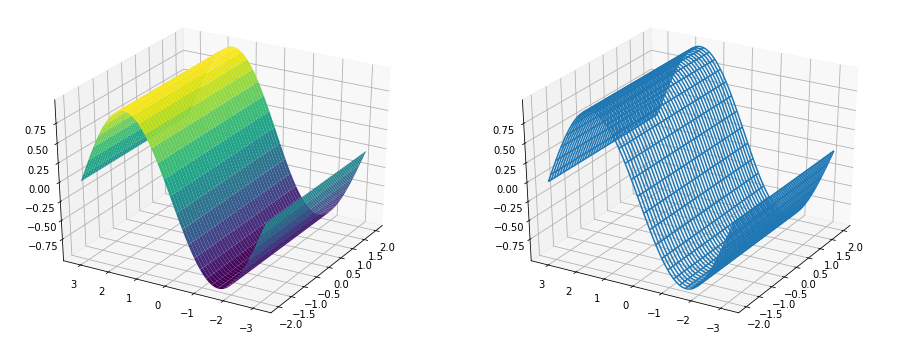

In [32]:
# Armo los vectores/matrices...
step = 0.1
x = np.arange(-2, 2 + step, step)
y = np.arange(-np.pi, np.pi + step, step)
X, Y = np.meshgrid(x, y)
Z = np.sin(Y)

## Con doble for sería...
# Z = np.empty_like(X)
# for i in range(len(y)):
#     for j in range(len(x)):
#         Z[i,j] = np.sin(y[i])

# Grafico...
fig, ax = plt.subplots(1, 2, figsize=(16,6), subplot_kw={'projection':'3d', 'azim':-150},
                       gridspec_kw={'wspace':0.1})
ax[0].plot_surface(X, Y, Z, cmap='viridis')
ax[1].plot_wireframe(X, Y, Z);

***Como imagen, en escala de grises y con el mapa de color de la superficie usada previamente...***

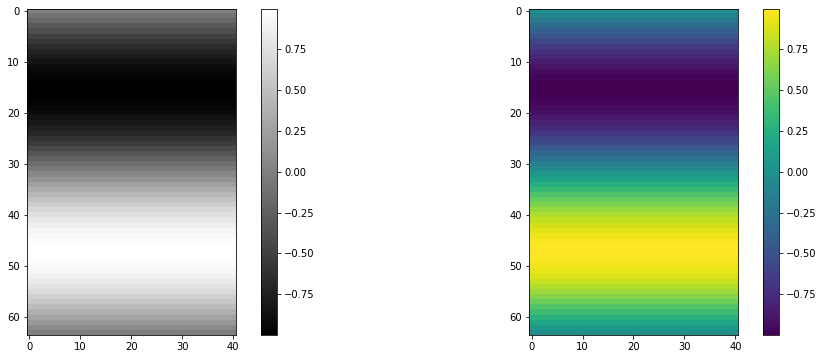

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(18,6), gridspec_kw={'wspace':0})
for axx, cmap in zip(ax, ['gray','viridis']):
    cb = axx.imshow(Z, cmap=cmap)
    fig.colorbar(cb, ax=axx)

***
***
# 2.1 Actividad 2

***
>***Generar una imagen digital con 20 niveles que represente a la función:***
$$
f(x,y)=20e^{- \pi \frac{(x- 128)^2+(y-128)^2}{128}} \quad \quad x,y \in [0,256]
$$
>
>***Luego, representar la función de cuantización y del error de cuantización.***
***

***Primero calculo la función en ese dominio y la grafico como imagen...***

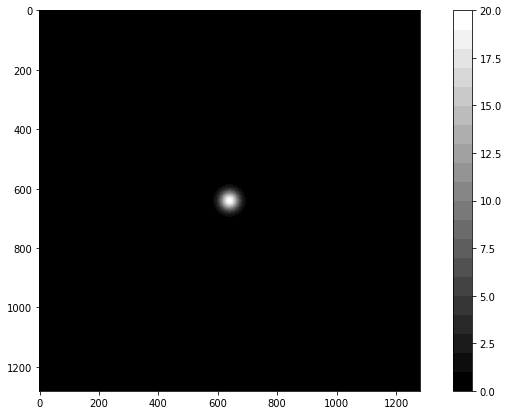

In [4]:
# Armo vectores...
step = 0.2
x = np.arange(0, 256 + step, step)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = 20*np.exp(-np.pi * ((X-128)**2 + (Y-128)**2) / 128)

# Grafico como imagen con 20 niveles..
n = 20
mi_cmap = mpl.cm.get_cmap('gray', n)
fig, ax = plt.subplots(1, figsize=(12,7))
cb = ax.imshow(Z, cmap=mi_cmap);
fig.colorbar(cb, ax=ax);

***Represento a función de cuantización y su error...***

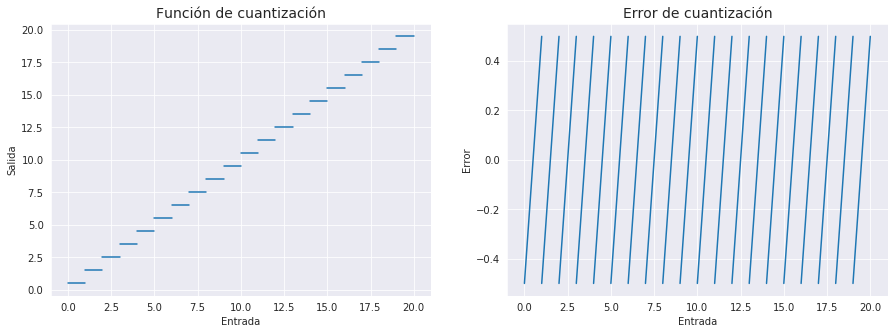

In [5]:
# Armo niveles..
step = (np.max(Z) - np.min(Z))/n
hstep = step/2
lev = np.linspace(np.min(Z) + hstep, np.max(Z) - hstep, n)

# Grafico..
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    for l in lev:
        stt, stp = l - hstep, l + hstep
        ax[0].plot([stt, stp], [l, l], 'tab:blue')
        ax[1].plot([stt, stp], [-hstep, hstep], 'tab:blue')
    ax[0].set(title='Función de cuantización', xlabel='Entrada', ylabel='Salida')
    ax[1].set(title='Error de cuantización', xlabel='Entrada', ylabel='Error');

***
***
# 2.1 Actividad 3

>***a) Modifica el programa anterior para simular la generación de N imágenes de 20 niveles de gris que representen esa función.<br> A diferencia del caso anterior, considerá que la señal analógica que entra al sistema de detección está corrompida por ruido aleatorio aditivo de media cero.<br>
Luego, promediar las N imágenes y representar el error de cuantización que afecta a la imagen promedio. ¿Es mayor o menor que en la actividad anterior?***

>***b) Generá y mostrá las siguientes imágenes:<br>
>-) la imagen de f(x,y)<br>
>-) la imagen de f(x,y) cuantizada<br>
>-) la imagen f(x,y) + ruido aleatorio + cuantización***

***Voy a hacer los dos incisos juntos, mostrando una señal determinista, una estocástica y una resultante de varias estocásticas promediadas.<br>
Considerando solo la zona central del dominio para evidenciar mejor lo buscado, a continuación creo las señales, hago la cuantización y grafico cada una...***

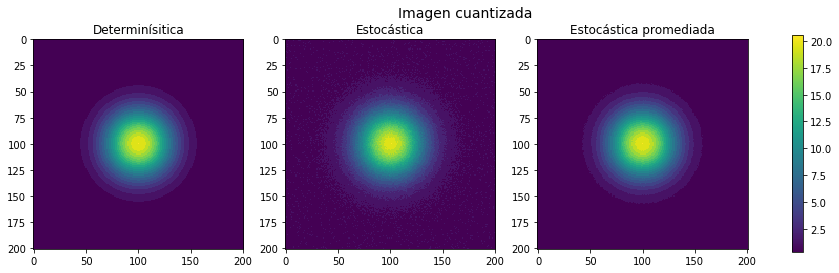

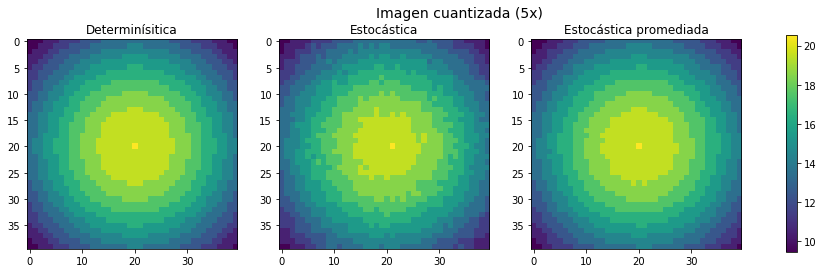

In [9]:
# DOMINIO...
dstep = 0.2
x = np.arange(108, 148 + dstep, dstep)
y = x.copy()
X, Y = np.meshgrid(x, y)

# SEÑALES..
# Determinista única...
Z0 = 20*np.exp(-np.pi * ((X-128)**2 + (Y-128)**2) / 128)

# Estocástica única...
de = 0.2
Z1 = 20*np.exp(-np.pi * ((X-128)**2 + (Y-128)**2) / 128) + np.random.normal(0, de, X.shape)

# Estocásticas promediadas..
N = 20          
Z2 = np.zeros_like(X)
for i in range(N):
    Z2 += (1/N)*(20*np.exp(-np.pi * ((X-128)**2 + (Y-128)**2) / 128) + np.random.normal(0, de, X.shape))

    
# CUANTIZACIÓN Y GRÁFICADO..  
# Función de cuantización...
n = 20
def cuantt(z, n): 
    zstep =  (np.max(z)-np.min(z))/n
    hzstep = zstep/2
    z_c = np.floor((z - np.min(z)) / zstep)*zstep + np.min(z) + hzstep 
    return z_c

# Parámetros para figura..
zoom = [1, 5]
tit = ['Imagen cuantizada', 'Imagen cuantizada ({}x)'.format(zoom[1])]
subtit = ['Determinísitica', 'Estocástica', 'Estocástica promediada']

# Grafico..
for t, zm in zip(tit, zoom): 
    fig, ax = plt.subplots(1, 3, figsize=(16,4))
    fig.suptitle(t, fontsize=14);
    i = (zm - 1) / (zm * 2)
    idx = np.arange(int(i*X.shape[0]), int((i + 1/zm)*X.shape[0])) 
    for z, axx, st in zip([Z0, Z1, Z2], ax, subtit):
        z_c = cuantt(z, n)     # cuantización           
        cb = axx.imshow(z_c[np.ix_(idx, idx)])
        axx.set_title(st, fontsize=12)
    fig.colorbar(cb, ax=ax);

***Puede verse el efecto de falsos contornos que produce la cuantización sobre una señal determinista, y cómo es mucho menos drástico en caso de una señal con ruido. A su vez, se observa que promediando señales estocásticas se recupera parte del efecto.<br>
Eso mismo puede verse mostrando el error de cuantización en cada una...***

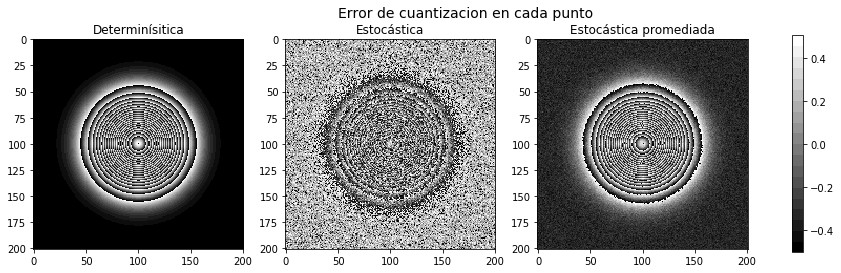

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(16,4))
fig.suptitle('Error de cuantizacion en cada punto', fontsize=14);
mi_cmap = mpl.cm.get_cmap('gray', n)
for z, axx, st in zip([Z0, Z1, Z2], ax, subtit):
    z_c = cuantt(z, n)     # cuantización   
    z_e = z - z_c          # error por cuantización
    cb = axx.imshow(z_e, cmap=mi_cmap)
    axx.set_title(st, fontsize=12)
fig.colorbar(cb, ax=ax);

***
***
# 2.1 Actividad 4

***
>***Lee las siguientes imágenes, y para cada una indicá:<br>
-) el tamaño en cantidad de pixeles.<br>
-) la profundidad (en bits).<br>
-) el tipo de dato (uint8, double, uint16, etc).<br>
-) el tipo de color: truecolor, etc.<br>
Y ya que estás, probá de visualizarlas.***
***

In [ ]:
# EJECUTAR ESTA CELDA SOLO SI SE VA A CORRER EN COLAB...
!git clone https://github.com/tvillani22/PSeI.git
import os
os.chdir('PSeI/')

***Usando la librería Pillow y de acuerdo a [esta nomenclatura de modos](https://pillow.readthedocs.io/en/latest/handbook/concepts.html#modes)...***


ARCHIVO: ancla.jpg 
------------------------------
Tamaño en píxeles: Ancho=267; Alto=169; Total=45123
Tipo de color:  Truecolor
Profundidad de bits:  24
Tipo de dato:  uint8

ARCHIVO: mamo.bmp 
------------------------------
Tamaño en píxeles: Ancho=389; Alto=459; Total=178551
Tipo de color:  Escala de grises
Profundidad de bits:  8
Tipo de dato:  uint8

ARCHIVO: Abdomen1.tif 
------------------------------
Tamaño en píxeles: Ancho=1680; Alto=1596; Total=2681280
Tipo de color:  Escala de grises
Profundidad de bits:  8
Tipo de dato:  uint8


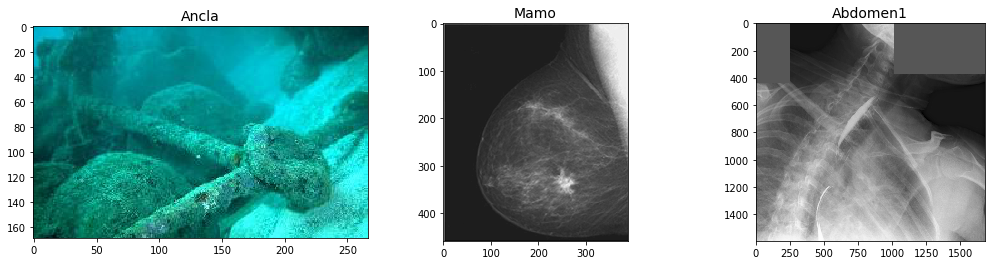

In [11]:
# Con Pillow
import PIL.Image

def ct_bd(modo):
    dic = {'L': ['Escala de grises', 8], 'RGB': ['Truecolor', 24], 'RGBA': ['Deepcolor', 32]}
    return dic.get(modo, 'Modo no reconocido')  

files = ['ancla.jpg',  'mamo.bmp', 'Abdomen1.tif']
fig, ax = plt.subplots(1, 3, figsize=(18,4), gridspec_kw={'wspace':0})

for file, axx in zip(files, ax):
    print('\nARCHIVO:', file, '\n' + 30*'-')
    img = PIL.Image.open('Data/' + file)
    print('Tamaño en píxeles: Ancho={}; Alto={}; Total={}'
          .format(img.width, img.height, img.width*img.height))
    print('Tipo de color: ', ct_bd(img.mode)[0])
    print('Profundidad de bits: ', ct_bd(img.mode)[1])
    print('Tipo de dato: ', np.array(img).dtype)
    axx.imshow(img, cmap='gray')
    axx.set_title(file.split('.')[0].capitalize())

***
***
***